In [2]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import io

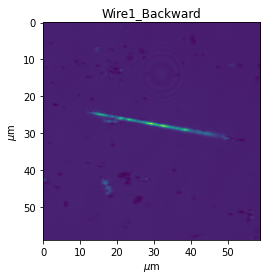

In [41]:
Wire1_Backward = io.imread("20220707SiNx/Wire1_150V_400V_5D.tif")[0]
pixel_to_length = 0.106236*6.5/6
fig, ax = plt.subplots()
Backward = ax.imshow(Wire1_Backward)
Backward.set_extent(np.array(Backward.get_extent())*pixel_to_length)
ax.autoscale(False)
ax.set_xlabel('$\mu$m')
ax.set_ylabel('$\mu$m')
ax.set_title('Wire1_Backward')
fig.savefig('Result')

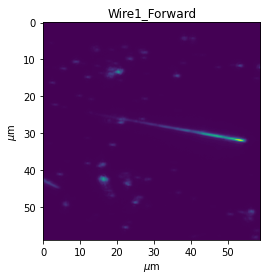

In [66]:
Wire1_Forward = io.imread("20220707SiNx/Wire1_150V_400V_5D.tif")[1]
fig, ax = plt.subplots()
Forward = ax.imshow(Wire1_Forward)
Forward.set_extent(np.array(Forward.get_extent())*pixel_to_length)
ax.autoscale(False)
ax.set_xlabel('$\mu$m')
ax.set_ylabel('$\mu$m')
ax.set_title('Wire1_Forward')
fig.savefig('Result')

In [58]:
No_Particle_Region_Backward = Wire1_Backward[150:250,370:470]
No_Particle_Region_Forward = Wire1_Forward[150:250,370:470]
No_Particle_Mean_BW = np.mean(No_Particle_Region_Backward)
No_Particle_Mean_FW = np.mean(No_Particle_Region_Forward)
No_Particle_Ratio = No_Particle_Mean_BW/No_Particle_Mean_FW

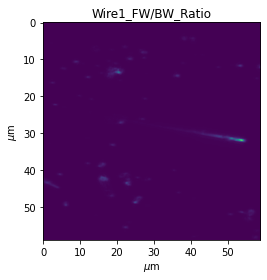

In [64]:
Wire1_Ratio = np.divide(Wire1_Forward*No_Particle_Ratio,Wire1_Backward)
pixel_to_length = 0.106236*6.5/6
fig, ax = plt.subplots()
Ratio = ax.imshow(Wire1_Ratio)
Ratio.set_extent(np.array(Ratio.get_extent())*pixel_to_length)
ax.autoscale(False)
ax.set_xlabel('$\mu$m')
ax.set_ylabel('$\mu$m')
ax.set_title('Wire1_FW/BW_Ratio')
fig.savefig('Result')

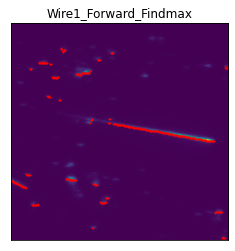

In [79]:
#Since wire is position horizontally, use np argmax to find maximum along the horizontal axis 
wire1_FW_maximum = np.argmax(Wire1_Forward,axis = 0)
xpos = np.arange(0,512,1)
fig, ax = plt.subplots()
Forward_Findmax = ax.imshow(Wire1_Forward)
ax.autoscale(False)
ax.scatter(xpos,wire1_FW_maximum,s = 0.5,c = 'r')
ax.set_title('Wire1_Forward_Findmax')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('Result')

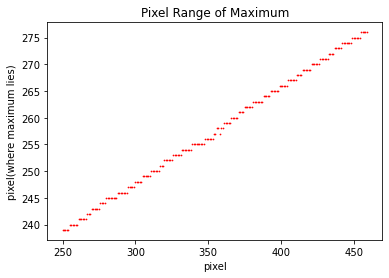

In [87]:
#Now determine the range where the nanowire lies
fig, ax = plt.subplots()
start = 250
end = 460
plt.scatter(xpos[start:end],wire1_FW_maximum[start:end],s = 0.5,c = 'r')
plt.xlabel('pixel')
plt.ylabel('pixel(where maximum lies)')
ax.set_title('Pixel Range of Maximum')
fig.savefig('Result')

#need smaller range to calculate more accurate pmt transition ratio
strictstart = 250
strictend = 460
#determine the transition ratio between pmt 
pmt150 = io.imread(path +"SiNW_PMT400_Pol5.tif")
pmt300 = io.imread(path +"SiNW_PMT300_Pol5.tif")
#plt.plot(xpos[start:end],pmt400[ypos[start:end],xpos[start:end]])
#plt.plot(xpos[start:end],pmt300[ypos[start:end],xpos[start:end]])
ratio = np.divide(pmt400[ypos[strictstart:strictend],xpos[strictstart:strictend]],pmt300[ypos[strictstart:strictend],xpos[strictstart:strictend]])
plt.plot(xpos[strictstart:strictend],ratio)
ratio300to400 = np.mean(ratio)

pmt300 = io.imread(path +"SiNW_PMT300_Pol20.tif")
pmt200 = io.imread(path +"SiNW_PMT200_Pol20.tif")
#plt.plot(xpos[start:end],pmt400[ypos[start:end],xpos[start:end]])
#plt.plot(xpos[start:end],pmt300[ypos[start:end],xpos[start:end]])
ratio = np.divide(pmt300[ypos[strictstart:strictend],xpos[strictstart:strictend]],pmt200[ypos[strictstart:strictend],xpos[strictstart:strictend]])
plt.plot(xpos[strictstart:strictend],ratio)
ratio200to300 = np.mean(ratio)

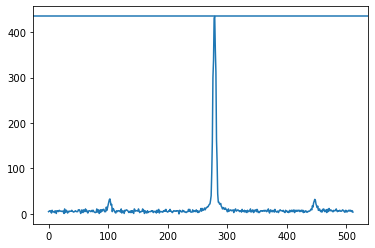

In [119]:
#point wise calculation 
def extract(position,pmt1,pmt2,power):
    base = io.imread("20220707SiNx/Wire1_80V_150V_34D.tif")[1]
    data = io.imread("20220707SiNx/Wire1_%dV_%dV_%dD.tif"%(pmt1,pmt2,power))[1]
    ypos = np.argmax(base,axis = 0)
    point = data[ypos[position],position]
    return point
base = io.imread("20220707SiNx/Wire1_80V_150V_34D.tif")[1]
base_backward = io.imread("20220707SiNx/Wire1_80V_150V_34D.tif")[0]
plt.plot(base[:,466])
plt.axhline(y = extract(466,80,150,34))

Text(0.5, 1.0, 'Backward')

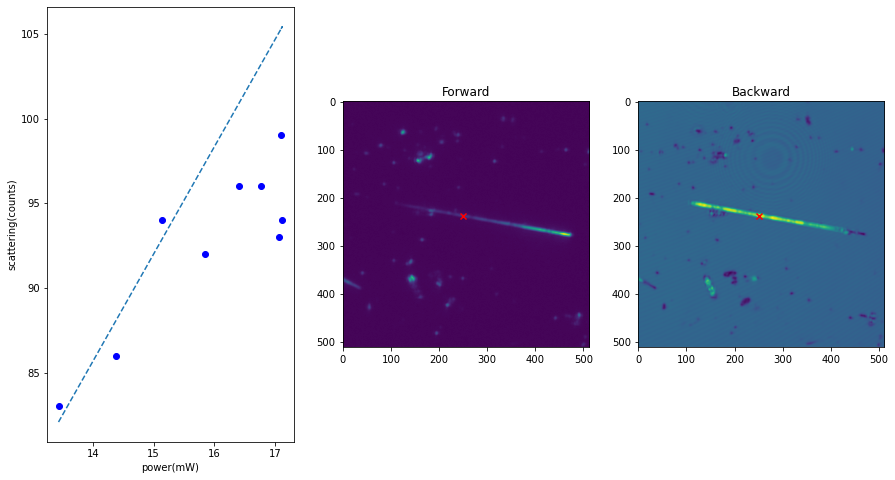

In [150]:
#input desired position here 
position = 250
#import power
fig, axs = plt.subplots(1,3,figsize=(15,8))
ax1 = plt.subplot(131)
angle = [34,36,38,40,42,44,46,48,50]
power = [13.43,14.38,15.13,15.85,16.41,16.77,17.06,17.12,17.1]
fitting = np.zeros([3])
for i in range(0,np.size(angle)):
    plt.scatter(power[i],extract(position,80,150,angle[i]),c= 'b')
    if i < 3:
        fitting[i] = extract(position,80,150,angle[i])
coef = np.polyfit(power[0:3],fitting,1)
poly1d_fn = np.poly1d(coef)
plt.plot(power,poly1d_fn(power),'--')
plt.xlabel('power(mW)')
plt.ylabel('scattering(counts)')
ax2 = plt.subplot(132)
plt.imshow(base)
plt.scatter(position,ypos[position],c = 'r',marker = "x")
plt.title('Forward')
ax2 = plt.subplot(133)
plt.imshow(base_backward)
plt.scatter(position,ypos[position],c = 'r',marker = "x")
plt.title('Backward')